The purpose of this project is to determine if a place is "Real", if the place is a moving target (boats, ferry, cruise, etc) if the pin is in the correct location. I will also be looking if the place is a duplicate venue and which state has the most checkins in a state. I will also be analyzing the number of check-ins in the data to determine If the place is real or fake. 

In [1]:
# datafile = "WaterVenue_Evaluation_v2.0.tsv"
datafile = "Place Evaluation v2.csv"

In [2]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster

# Read Data File

In [3]:
#Fetching for the csv file
data = pd.read_csv(datafile, encoding = "ISO-8859-1")
data.head(10)

,store name,latitude,longitude,Address,city,state,checkins,Location Realness
0,Cornucopia,29.611670,-94.042970,8886 Thorne LaneÊ,Port Arthur,TX,3867,Real
1,The Corner Store,36.169693,-75.757650,435 Osseo Rd,Duck,NC,135,Real
2,Sweet Spot,36.957530,-122.017340,8409 North Rockledge RoadÊ,Santa Cruz,CA,75,Real
3,Decorama Boutique,41.512970,-71.323140,3245 Thornton avenue,Newport,RI,5525,Real
4,One of a Kind Studio,26.871365,-82.313780,65 Rosewood St.Ê,Placida,FL,183,Real
5,Not Just Groceries,25.971457,-81.726715,Framingham Hwy,Marco Island,FL,243,Real
6,The Full Cart,25.789354,-80.183140,754 Oak St.Ê,Miami,FL,1335,Real
7,Dollar Savings Store,47.601265,-122.338100,Baltimore Rd,Seattle,WA,388,Real
8,Healthy Treats,38.841060,-76.539380,639 Middle River AvenueÊ,Galesville,MD,639,Real
9,Farm to Shelf,38.025160,-75.233280,New Rochelle driveway,Chincoteague,VA,308,Real


Drop column

In [5]:
#drop column that I dont need
df = pd.read_csv(datafile, encoding = "ISO-8859-1")
df_placeEval = df.dropna(axis=0, how='any')

# for speed purposes
df_placeEval.head(5)

,store name,latitude,longitude,Address,city,state,checkins,Location Realness
0,Cornucopia,29.611670,-94.04297,8886 Thorne LaneÊ,Port Arthur,TX,3867,Real
1,The Corner Store,36.169693,-75.75765,435 Osseo Rd,Duck,NC,135,Real
2,Sweet Spot,36.957530,-122.01734,8409 North Rockledge RoadÊ,Santa Cruz,CA,75,Real
3,Decorama Boutique,41.512970,-71.32314,3245 Thornton avenue,Newport,RI,5525,Real
4,One of a Kind Studio,26.871365,-82.31378,65 Rosewood St.Ê,Placida,FL,183,Real


# Plotting data on google maps

Using the lat-long data from the CSV to plot the points on the Folium map to display for the analysis. 

In [6]:
folium_map = folium.Map(location=[38, -97],
                        zoom_start=4)

In [7]:
# mark each station as a point
for index, row in df_placeEval.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['store name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(folium_map)

In [8]:
import folium
from folium import plugins

Latlong = df_placeEval[['latitude', 'longitude']].as_matrix()

# plot heatmap
folium_map.add_child(plugins.HeatMap(Latlong, radius=15))
folium_map

/Users/lasanajabbi/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


As you can see the points are cluttered on the map. So I'm going to create a marker cluster to make the points more manageable

In [9]:
from folium.plugins import FastMarkerCluster


folium_map = folium.Map(location=[38, -97],
                        zoom_start=4.4)

# These two lines creates FastMarkerClusters
FastMarkerCluster(data=list(zip(df_placeEval['latitude'].values, df_placeEval['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)

folium_map

# Filter Dataframe

Filtering the data frame for analysis based on the number of check-ins in each state

In [10]:
# use filter which will create a new copy by default
new = df_placeEval.filter(['state','checkins'], axis=1)

In [11]:
#sort the recurring states & checkins
sorted = new.sort_values(by=['state', 'checkins'])

# Plot A Horizontal Barchart 

Plot A horizontal bar chart based to display the states with the most check-ins 

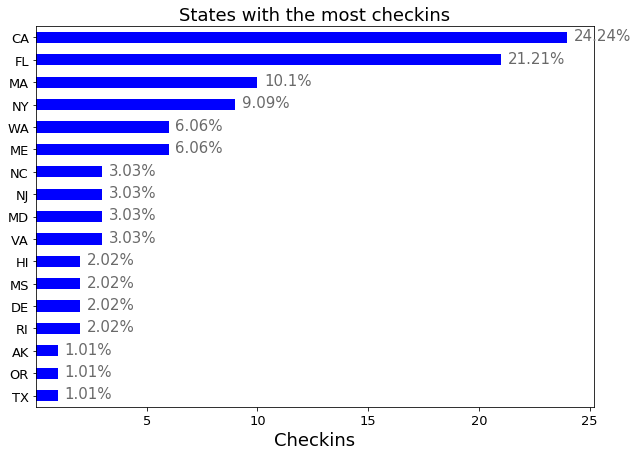

In [13]:
ax = sorted['state'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("States with the most checkins", fontsize=18)
ax.set_xlabel("Checkins", fontsize=18);
ax.set_xticks([5, 10, 15, 20, 25])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

The results of the bar chart gave me a good accurate analysis of where most of the venues are populating on the water

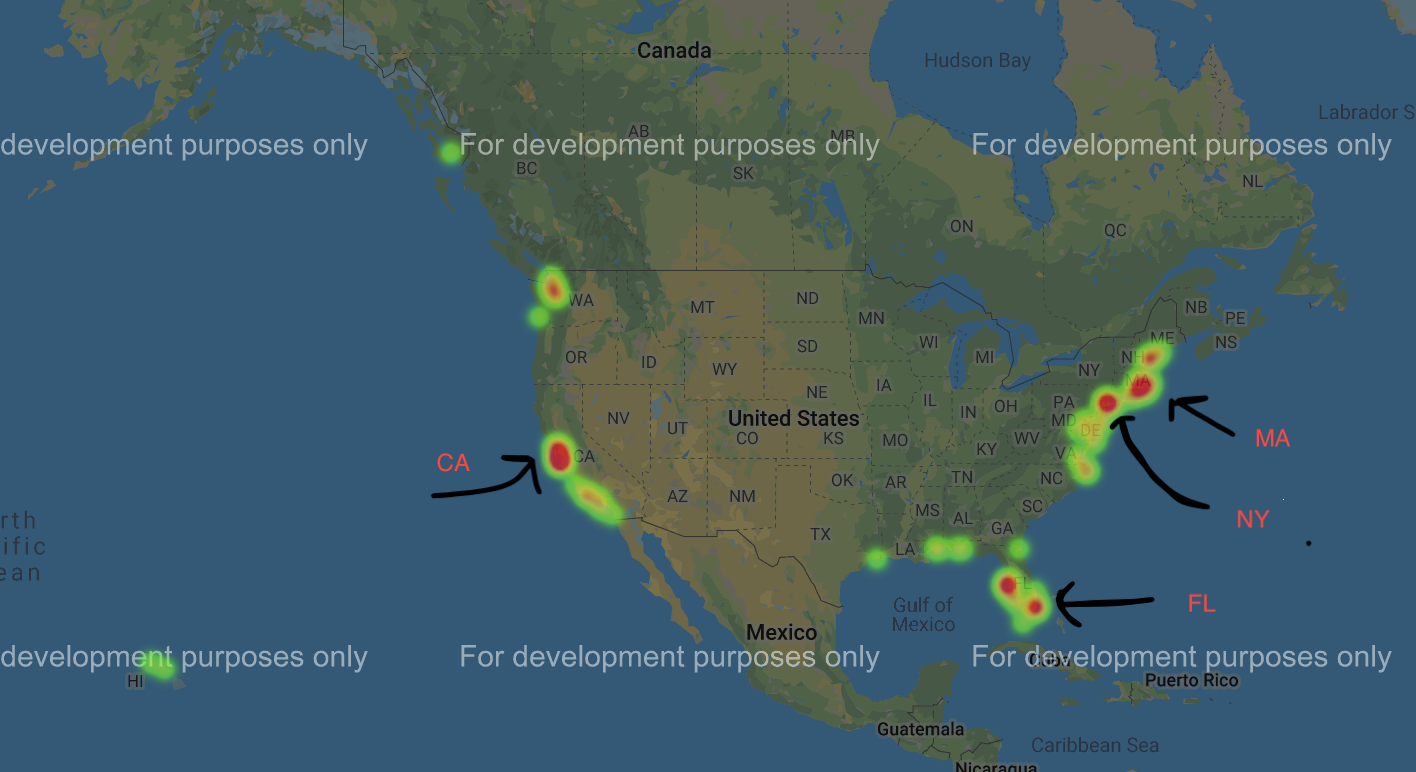

In [14]:
#Displaying the image from the html file
from IPython.display import Image
Image(filename='Result analysis.png', width=700, height=700)

In [15]:
%matplotlib inline

# Plot Bar chart

Next, I want to know whether the venues that are displayed on the map are Real, Fake, Private, or closed based on the data in the csv 

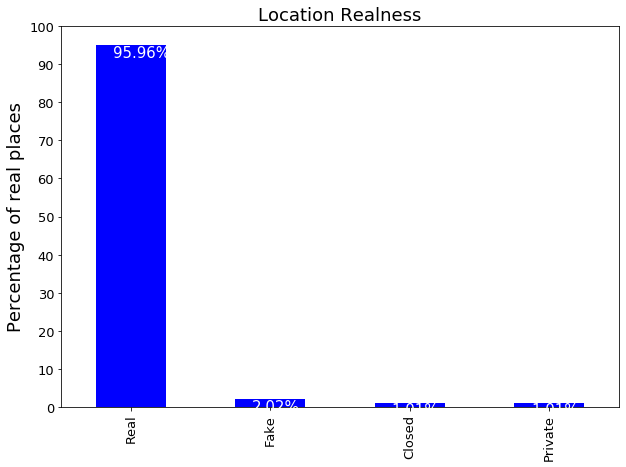

In [16]:
ax = df_placeEval['Location Realness'].value_counts().plot(kind='bar', figsize=(10,7),
                                                  color="blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Location Realness", fontsize=18)
ax.set_ylabel("Percentage of real places", fontsize=18);
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='white')

# Seaborn Graphs

In [35]:
import seaborn as sb

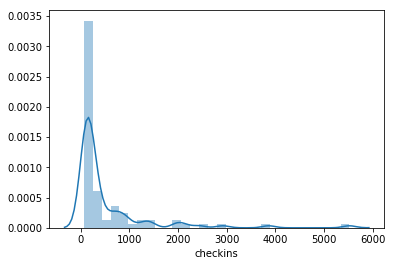

In [36]:
#Distribution plot chart based on checkins
sb.distplot(df_placeEval['checkins'])